# Modelado Motor de Corriente Continua e imán permanente

#### Esquema de la idealización física del motor eléctrico

```{figure} fig_circuito_motor.png
:alt: diagrama del motor de continua
:name: diagrama_motor
:align: center
:width: 450px

Diagrama idealizado del motor de corriente continua
```

#### Diagrama del sistema desde el punto de vista de entradas y salidas

```{figure} esquema_motor.png
:name: motor_es
:width: 450px
:align: center
:alt: Esquema Rotacional

Esquema entrada/salida del motor de corriente continua
```


### Descripción del motor y su funcionamiento

A continuación se deja un video describiendo las partes de un motor y la forma de funcionamiento.

[![motor: descripción](motor_parte0.png)](https://youtu.be/ztMgB1UofxU "Motor eléctrico: descripción")

#### Modelado del motor

Los modelos matemáticos proveen de una predicción de como el sistema se va a comportar o evolucionar. En general los modelos matemáticos **NO son exactos**. Sin embargo, serán útiles para el diseño de los sistemas de control, debido a que este deberá proveer de la robustez requerida mediante el uso de la realimentación.

Algunas  simplificaciones que consideraremos para este modelo son:

1. La resistencia, inductancia, masa (o momento de inercia) y "viscosidad" son constantes. Es decir, no contemplaremos cambios de ningún tipo, como por ejemplo el efecto de la temperatura.
1. El rozamiento viscoso es lineal. Es decir, la viscosidad es es proporcional a la velocidad ($\tau_d=D_m*\omega$).

#### Desarrollo de las ecuaciones

El circuito eléctrico se relaciona con el mecánico, y viceversa, por medio de la siguientes ecuaciones:

$$
\begin{aligned}
V_b(t) &= K_b \frac{d\theta_m(t)}{dt} &\text{(fuerza contraelectromotriz)}\\
 \tau_m(t) &= K_t i_a(t) &\text{(torque del motor)}
\end{aligned}
$$

para las mismas unidades $K_t = K_b$

$$
\begin{aligned}
R_a i_a(t) + L_a \frac{di_a(t)}{dt} + V_b(t) &= e_a(t) & \text{(Ec. de la malla eléctrica de la armadura)}\\
\tau_m(t) - \tau_r(t) - D_m\frac{d\theta_m(t)}{dt} &= J_m \frac{d^2\theta_m(t)}{dt^2} & \text{(Ecs. mecánica)}
\end{aligned}
$$

Reemplazando obtenemos el sistema de ecuaciones de parámetros concentrados (no depende de la ubicación espacial de los componentes del sistema), lineal (cumple con superposición) e invariante en el tiempo (su comportamiento no cambia con el tiempo). Como el sistema es lineal e invariante en el tiempo se dice que el sistema es LTI (linear time invariant).

$$
\begin{aligned}
R_a i_a(t) + L_a \frac{di_a(t)}{dt} + K_b \frac{d\theta_m(t)}{dt} &= e_a(t) \\
K_t i_a(t) - \tau_r(t) - D_m\frac{d\theta_m(t)}{dt} &= J_m \frac{d^2\theta_m(t)}{dt^2}
\end{aligned}
$$

## Funcion de transferencia: motor eléctrico DC de imán permanente

### Hallamos la TF usando la transformada de laplace

Supongamos CI nulas, es decir $i_a(t=0)=0$ y $(\theta_m(t=0)=0)$ entonces de las ecuaciones del motor obtenidas en ejemplos anteriores y aplicando la transformada de Laplace, tenemos:

$$ 
\left\{\begin{array}{c}
s~I_a(s) = \frac{1}{L_a} E_a(s) -\frac{ R_a}{L_a} I_a(s) -  \frac{K_b}{L_a} s~\Theta_m(s)  \\
s^2~\Theta_m(s) =   \frac{K_t}{J_m} I_a(s) - \frac{D_m}{J_m}s~\Theta_m(s) - \frac{1}{J_m} T_r(s)
\end{array}\right.
$$

agrupando las variables y despejando de la segunda ecuación la corriente $I_a(s)$:

$$ 
\begin{aligned}
\left(s+ \frac{ R_a}{L_a}\right)I_a(s) &= \frac{1}{L_a} E_a(s) - \frac{K_b}{L_a} s~\Theta_m(s)  \\
 I_a(s) &= \frac{J_m}{K_t}\left(s^2+ \frac{D_m}{J_m}s\right)~\Theta_m(s) + \frac{1}{K_t} T_r(s)
\end{aligned}
$$

Este sistema tiene 2 entradas, la entrada que podemos controlar $E_a(s)$ y la entrada de perturbación $T_r(s)$, por ser un sistema LTI podemos hallar las FTs de la siguiente forma:

$$ 
\left(s+ \frac{ R_a}{L_a}\right)\frac{J_m}{K_t}\left(s^2+ \frac{D_m}{J_m}s\right)\Theta_m(s) + \left(s+ \frac{ R_a}{L_a}\right)\frac{1}{K_t} T_r(s) = \frac{1}{L_a} E_a(s) - \frac{K_b}{L_a} s\Theta_m(s) 
$$

luego,

$$ 
\left(\left(s+ \frac{ R_a}{L_a}\right)~\frac{J_m}{K_t}\left(s^2+ \frac{D_m}{J_m}s\right)+\frac{K_b}{L_a} s\right)\Theta_m(s)  = \frac{1}{L_a} E_a(s) - \left(s+ \frac{ R_a}{L_a}\right)\frac{1}{K_t} T_r(s)
$$

luego considerando $T_r=0$, hallamos la FT desde la entrada $E_a$ a la salida $\Theta_m$:

$$ 
\frac{\Theta_m(s)} {E_a(s)}  = \frac{\frac{1}{L_a}}{\left(s+ \frac{ R_a}{L_a}\right)\frac{J_m}{K_t}\left(s^2+ \frac{D_m}{J_m}s\right)+\frac{K_b}{L_a} s}  
$$

finalmente si consideramos que $E_a=0$, hallamos la FT desde la entrada de perturbación $T_r$ a la salida $\Theta_m$:

$$
\frac{\Theta_m(s)} {T_r(s)}  =- \frac{\left(s+ \frac{ R_a}{L_a}\right)\frac{1}{K_t} }{\left(s+ \frac{ R_a}{L_a}\right)\frac{J_m}{K_t}\left(s^2+ \frac{D_m}{J_m}s\right)+\frac{K_b}{L_a} s}
$$

## Simulación de la dinámica del motor

In [2]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

In [6]:
Jm = 3.2284E-6;
Dm = 3.5077E-6;
K = 0.0274;
Ra = 4;
La = 2.75E-6;

s = ctrl.tf('s');
P_E2theta = 1/La/((s+Ra/La)*Jm/K*(s**2+Dm/Jm*s)+K/La*s)
P_E2theta

TransferFunction(array([9963.63636364]), array([3.22840000e-06, 4.69585805e+00, 2.78105745e+02, 0.00000000e+00]))

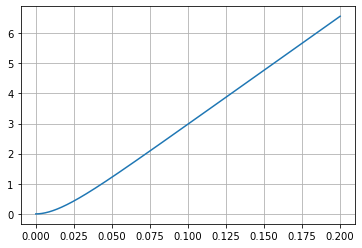

In [10]:
T = np.linspace(0,0.2,1000)
t,theta=ctrl.step_response(P_E2theta,T=T)
plt.figure()
plt.plot(t,theta)
plt.grid()